In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
data = pd.read_csv("AirPassengers.csv")
data.head()

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [ ]:
#EDA - Exploratory Data Analysis
#Clean
#Decide an algo for the given data
#Build a model

In [ ]:
data.shape

(144, 2)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Month        144 non-null    object
 1   #Passengers  144 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 2.4+ KB


In [ ]:
data.describe()

,#Passengers
count,144.000000
mean,280.298611
std,119.966317
min,104.000000
25%,180.000000
50%,265.500000
75%,360.500000
max,622.000000


In [ ]:
data['Month'] = pd.to_datetime(data['Month'])

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Month        144 non-null    datetime64[ns]
 1   #Passengers  144 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 2.4 KB


In [ ]:
data = data.set_index(['Month'])
data.head()

,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


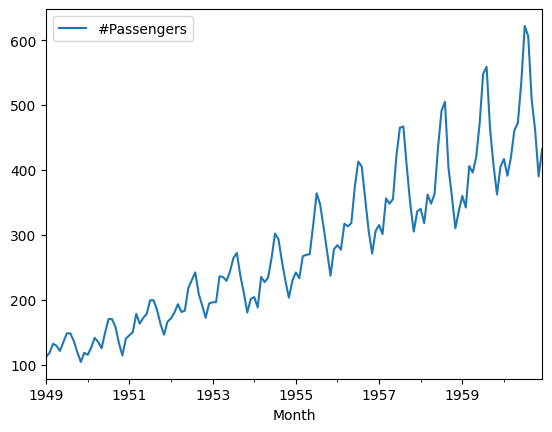

In [ ]:
data.plot()
plt.show()

In [ ]:
mean_log=data.rolling(window=12).mean()
std_log=data.rolling(window=12).std()

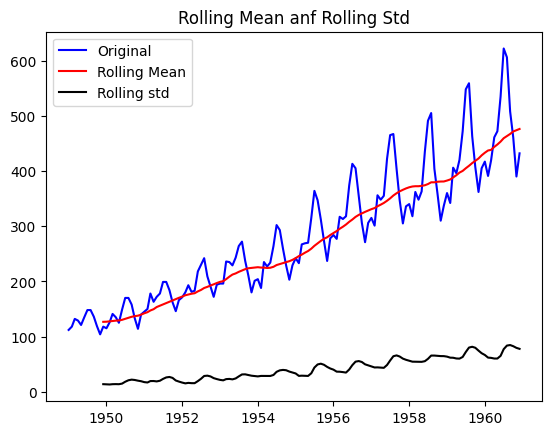

In [ ]:
plt.plot(data,color='blue',label='Original')
plt.plot(mean_log,color='red',label='Rolling Mean')
plt.plot(std_log,color='black',label='Rolling std')
plt.legend(loc='best')
plt.title('Rolling Mean anf Rolling Std')
plt.show()

In [ ]:
#From the above graph, we see that rolling mean itself has a trend component even though rolling standard deviation
#is fairly constant with time. For our time series to be stationary, we need to ensure that both the rolling statistics
#ie: mean & std. dev. remain time invariant or constant with time. Thus the curves for both of them have to be parallel to the x-axis,
# which in our case is not so.

In [ ]:
#Log transformation

first_log=np.log(data)

In [ ]:
first_log=first_log.dropna()

In [ ]:
mean_log=first_log.rolling(window=12).mean()
std_log=first_log.rolling(window=12).std()

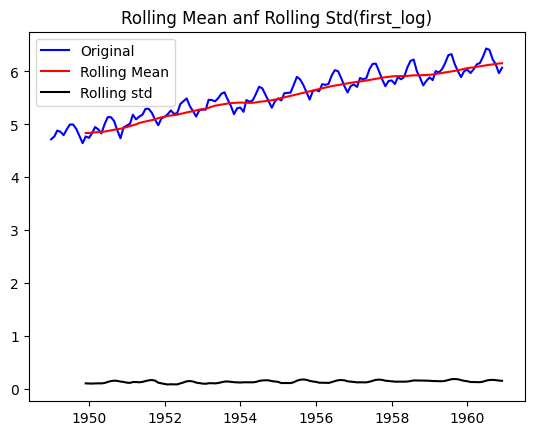

In [ ]:
plt.plot(first_log,color='blue',label='Original')
plt.plot(mean_log,color='red',label='Rolling Mean')
plt.plot(std_log,color='black',label='Rolling std')
plt.legend(loc='best')
plt.title('Rolling Mean anf Rolling Std(first_log)')
plt.show()

In [ ]:
new_data=first_log-mean_log
new_data=new_data.dropna()
new_data.head()

,#Passengers
Month,
1949-12-01,-0.065494
1950-01-01,-0.093449
1950-02-01,-0.007566
1950-03-01,0.099416
1950-04-01,0.052142


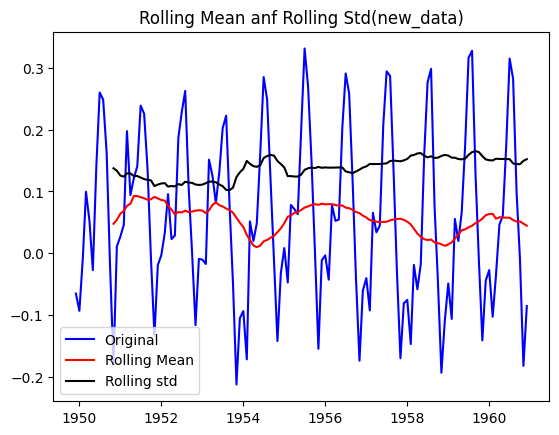

In [ ]:
mean_log=new_data.rolling(window=12).mean()
std_log=new_data.rolling(window=12).std()

plt.plot(new_data,color='blue',label='Original')
plt.plot(mean_log,color='red',label='Rolling Mean')
plt.plot(std_log,color='black',label='Rolling std')
plt.legend(loc='best')
plt.title('Rolling Mean anf Rolling Std(new_data)')
plt.show()

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose

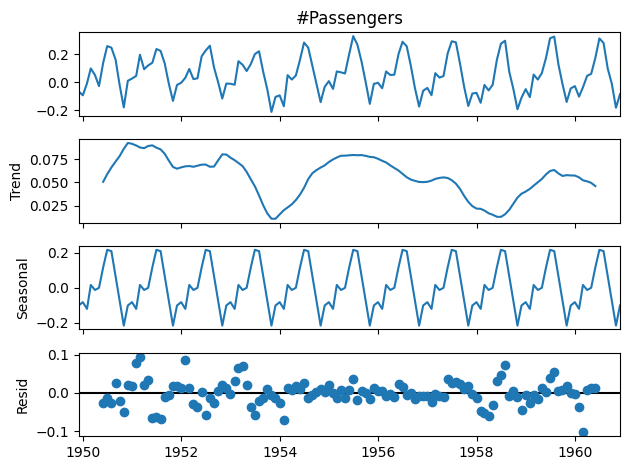

In [ ]:
decomposition = seasonal_decompose(new_data['#Passengers'])
decomposition.plot();

In [ ]:

from statsmodels.tsa.stattools import adfuller

#ADF Test - if the p-value < 0.05 - Data is stationary
result = adfuller(new_data)

print(f'ADF Statistic,{result[0]}') #some default value based upon the critial values
print(f'p-value={result[1]}')
print(f'n_lags,{result[2]}') #previous no.of observations used for prediction

#print(f'Result: The series is {"not " if result[1]>0.05 else ""}stationary')

if(result[1]>0.05):
    print("The series is not stationary")
else:
    print("series is stationary")

ADF Statistic,-3.1629079913008833
p-value=0.022234630001242206
n_lags,13
series is stationary


In [ ]:
#Model Building

from statsmodels.tsa.stattools import acf
from statsmodels.graphics.tsaplots import plot_acf

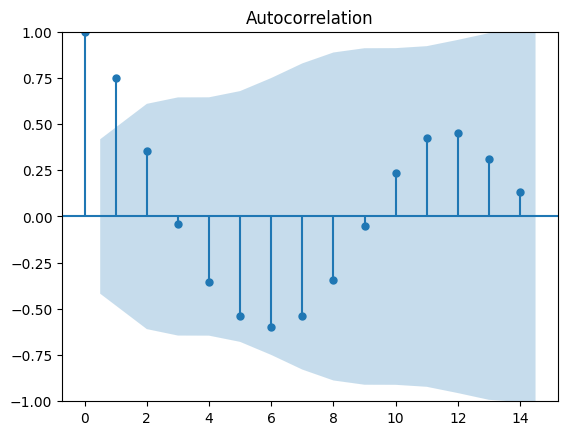

In [ ]:
acf_plot=acf(new_data.dropna()) #Gradual decrease and previuous point to that - 1
plot_acf(acf_plot);

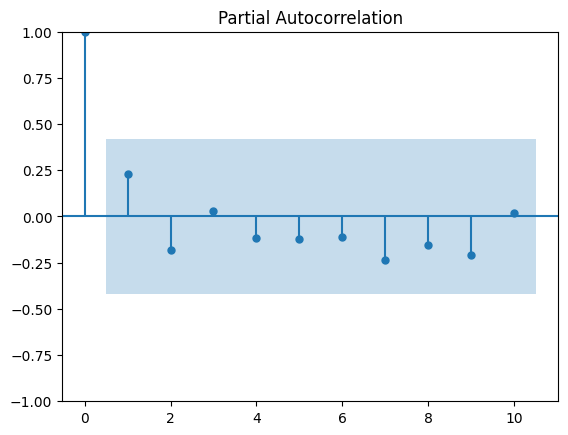

In [ ]:
from statsmodels.tsa.stattools import pacf
from statsmodels.graphics.tsaplots import plot_pacf

pacf_plot=pacf(new_data.dropna()) #th data point or lag where there is a sudden shut-off - 2
plot_pacf(pacf_plot, lags=10);

In [ ]:
train=new_data.iloc[:120]['#Passengers']
test=new_data.iloc[120:]['#Passengers']

In [ ]:
from statsmodels.tsa.arima.model import ARIMA

In [ ]:
model = ARIMA(train,order=(1,1,2)) #(p,d,q)
model_fit=model.fit()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<Axes: xlabel='Month'>

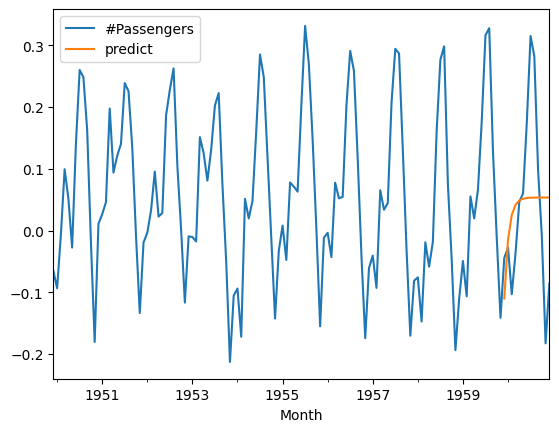

In [ ]:
new_data['predict']=model_fit.predict(start=len(train),end=len(train)+len(test)-1, dynamic=True)
new_data[['#Passengers','predict']].plot()

In [ ]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [ ]:
model=SARIMAX(train,order=(1,1,2),seasonal_order=(1,1,2,12))
model=model.fit()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'


<Axes: xlabel='Month'>

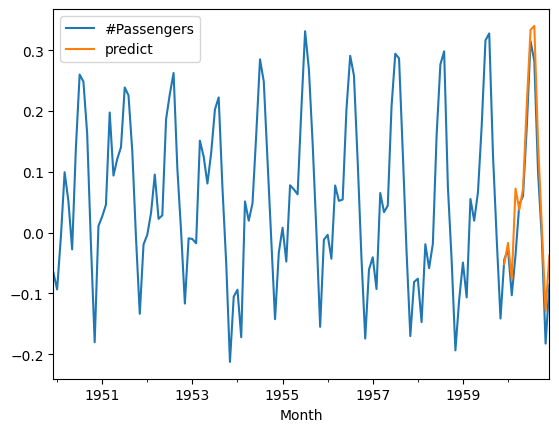

In [ ]:
new_data['predict']=model.predict(start=len(train), end=len(train)+len(test)-1,dynamic=True)
new_data[['#Passengers','predict']].plot()

<Axes: xlabel='Month'>

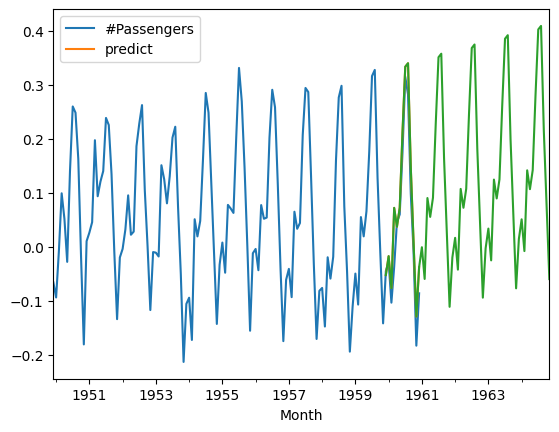

In [ ]:
forecast = model.forecast(steps=60) #5 years
new_data.plot()
forecast.plot()